# Th0Th - Devils Hole
-------
Moseley et al. (2016) present U-Th data from Devils Hole



#### References

Moseley, G.E., Edwards, R.L., Wendt, K.A., Cheng, H., Dublyansky, Y., Lu, Y., Boch, R. and Spötl, C., 2016. Reconciliation of the Devils Hole climate record with orbital forcing. Science, 351(6269), pp.165-168.

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import pandas as pd
import glob
import os 
mpl.rcParams['font.size'] = 12


In [12]:
def Get_Prior_Data(file_pattern, target_directory = f'/Users/jackcarter/Initial Thorium '): 
    file_pattern = os.path.join(target_directory, file_pattern)
    pickle_files = glob.glob(file_pattern)
    N = len(pickle_files)
    data = []
    for file_path in pickle_files:
        try:
            with open(file_path, 'rb') as f:
                data.append(pickle.load(f))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return data

In [3]:
data_dh2_e = Get_Prior_Data('Moseley_DevHole_DH2_E_IBIS_prior')
data_dh2_d1 = Get_Prior_Data('Moseley_DevHole_DH2_D1_IBIS_prior')
data_dh2_d2 = Get_Prior_Data('Moseley_DevHole_DH2_D2_IBIS_prior')
data_d2 = Get_Prior_Data('Moseley_DevHole_D2_IBIS_prior')


In [8]:
devils_hole_all = [data_d2[0], data_dh2_d1[0], data_dh2_d2[0], 
                  data_dh2_e[0]]

In [10]:
labels = ['D2', 'DH2-D1', 'DH2-D2', 'DH2-E']

# IBIS
------
A Devils Hole story told by IBIS



In [16]:
colors = ['magenta', 'darkorange', 'seagreen', 'dodgerblue']

(0.0, 0.02)

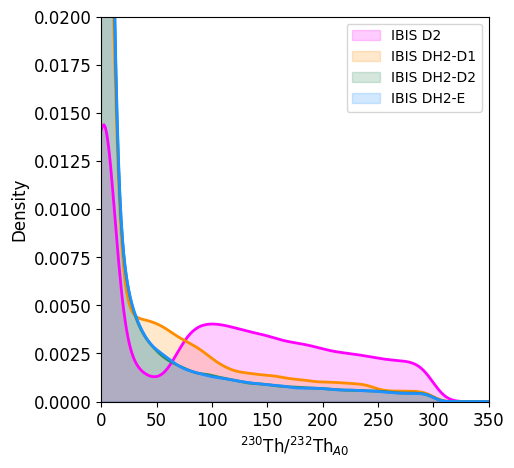

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
for i in range(4): 
    ax.plot(devils_hole_all[i].x, devils_hole_all[i].y, color = colors[i], lw = 2)
    ax.fill_between(devils_hole_all[i].x, devils_hole_all[i].y, color = colors[i], alpha = 0.2
                    , 
                   label = f'IBIS {labels[i]}')
ax.set_xlim(1e-10, 350)

ax.legend(fontsize = 10)
ax.set_ylim(bottom = 0.0)
ax.set_xlabel('$^{230}$Th/$^{232}$Th$_{A0}$')
ax.set_ylabel('Density')
#ax.set_xscale('log')
plt.ylim(0, 0.02)